In [1]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


## Load The Data

In [2]:
dfTr=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
dfGr=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/greeks.csv")
dfTs=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")
Smaple_Submission=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")

## Getting involved with the data

In [3]:
dfTr.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
dfTr.shape

(617, 58)

In [5]:
dfTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
#Descripe the data
def getDescription(df): 
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first quartile'] = desc.loc[:, '25%'].values
    summ['second quartile'] = desc.loc[:, '50%'].values
    summ['third quartile'] = desc.loc[:, '75%'].values
    return summ

In [7]:
getDescription(dfTr)

,data type,#missing,%missing,#unique,min,max,first quartile,second quartile,third quartile
Id,object,0,0.000000,617,NaN,NaN,NaN,NaN,NaN
AB,float64,0,0.000000,217,0.081187,6.161666,0.252107,0.354659,0.559763
AF,float64,0,0.000000,599,192.59328,28688.18766,2197.34548,3120.31896,4361.63739
AH,float64,0,0.000000,227,85.200147,1910.123198,85.200147,85.200147,113.73954
AM,float64,0,0.000000,605,3.177522,630.51823,12.270314,20.53311,39.139886
AR,float64,0,0.000000,130,8.138688,178.943634,8.138688,8.138688,8.138688
AX,float64,0,0.000000,427,0.699861,38.27088,4.128294,5.031912,6.431634
AY,float64,0,0.000000,148,0.025578,10.315851,0.025578,0.025578,0.036845
AZ,float64,0,0.000000,484,3.396778,38.971568,8.12958,10.46132,12.969516
BC,float64,0,0.000000,259,1.2299,1463.693448,1.2299,1.2299,5.081244


## EDA

### <b>Working on Numerical Features

In [8]:
Target=['Class']
allFeature=dfTr.columns.tolist()
included_features = [feature for feature in allFeature if feature not in Target]
numericalFeatures = dfTr[included_features].select_dtypes(include=['number'])
numericalFeatures

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,8.026928,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622


In [9]:
numericalFeatures.shape

(617, 55)

### <b>Get the distrbution of each feature</b>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

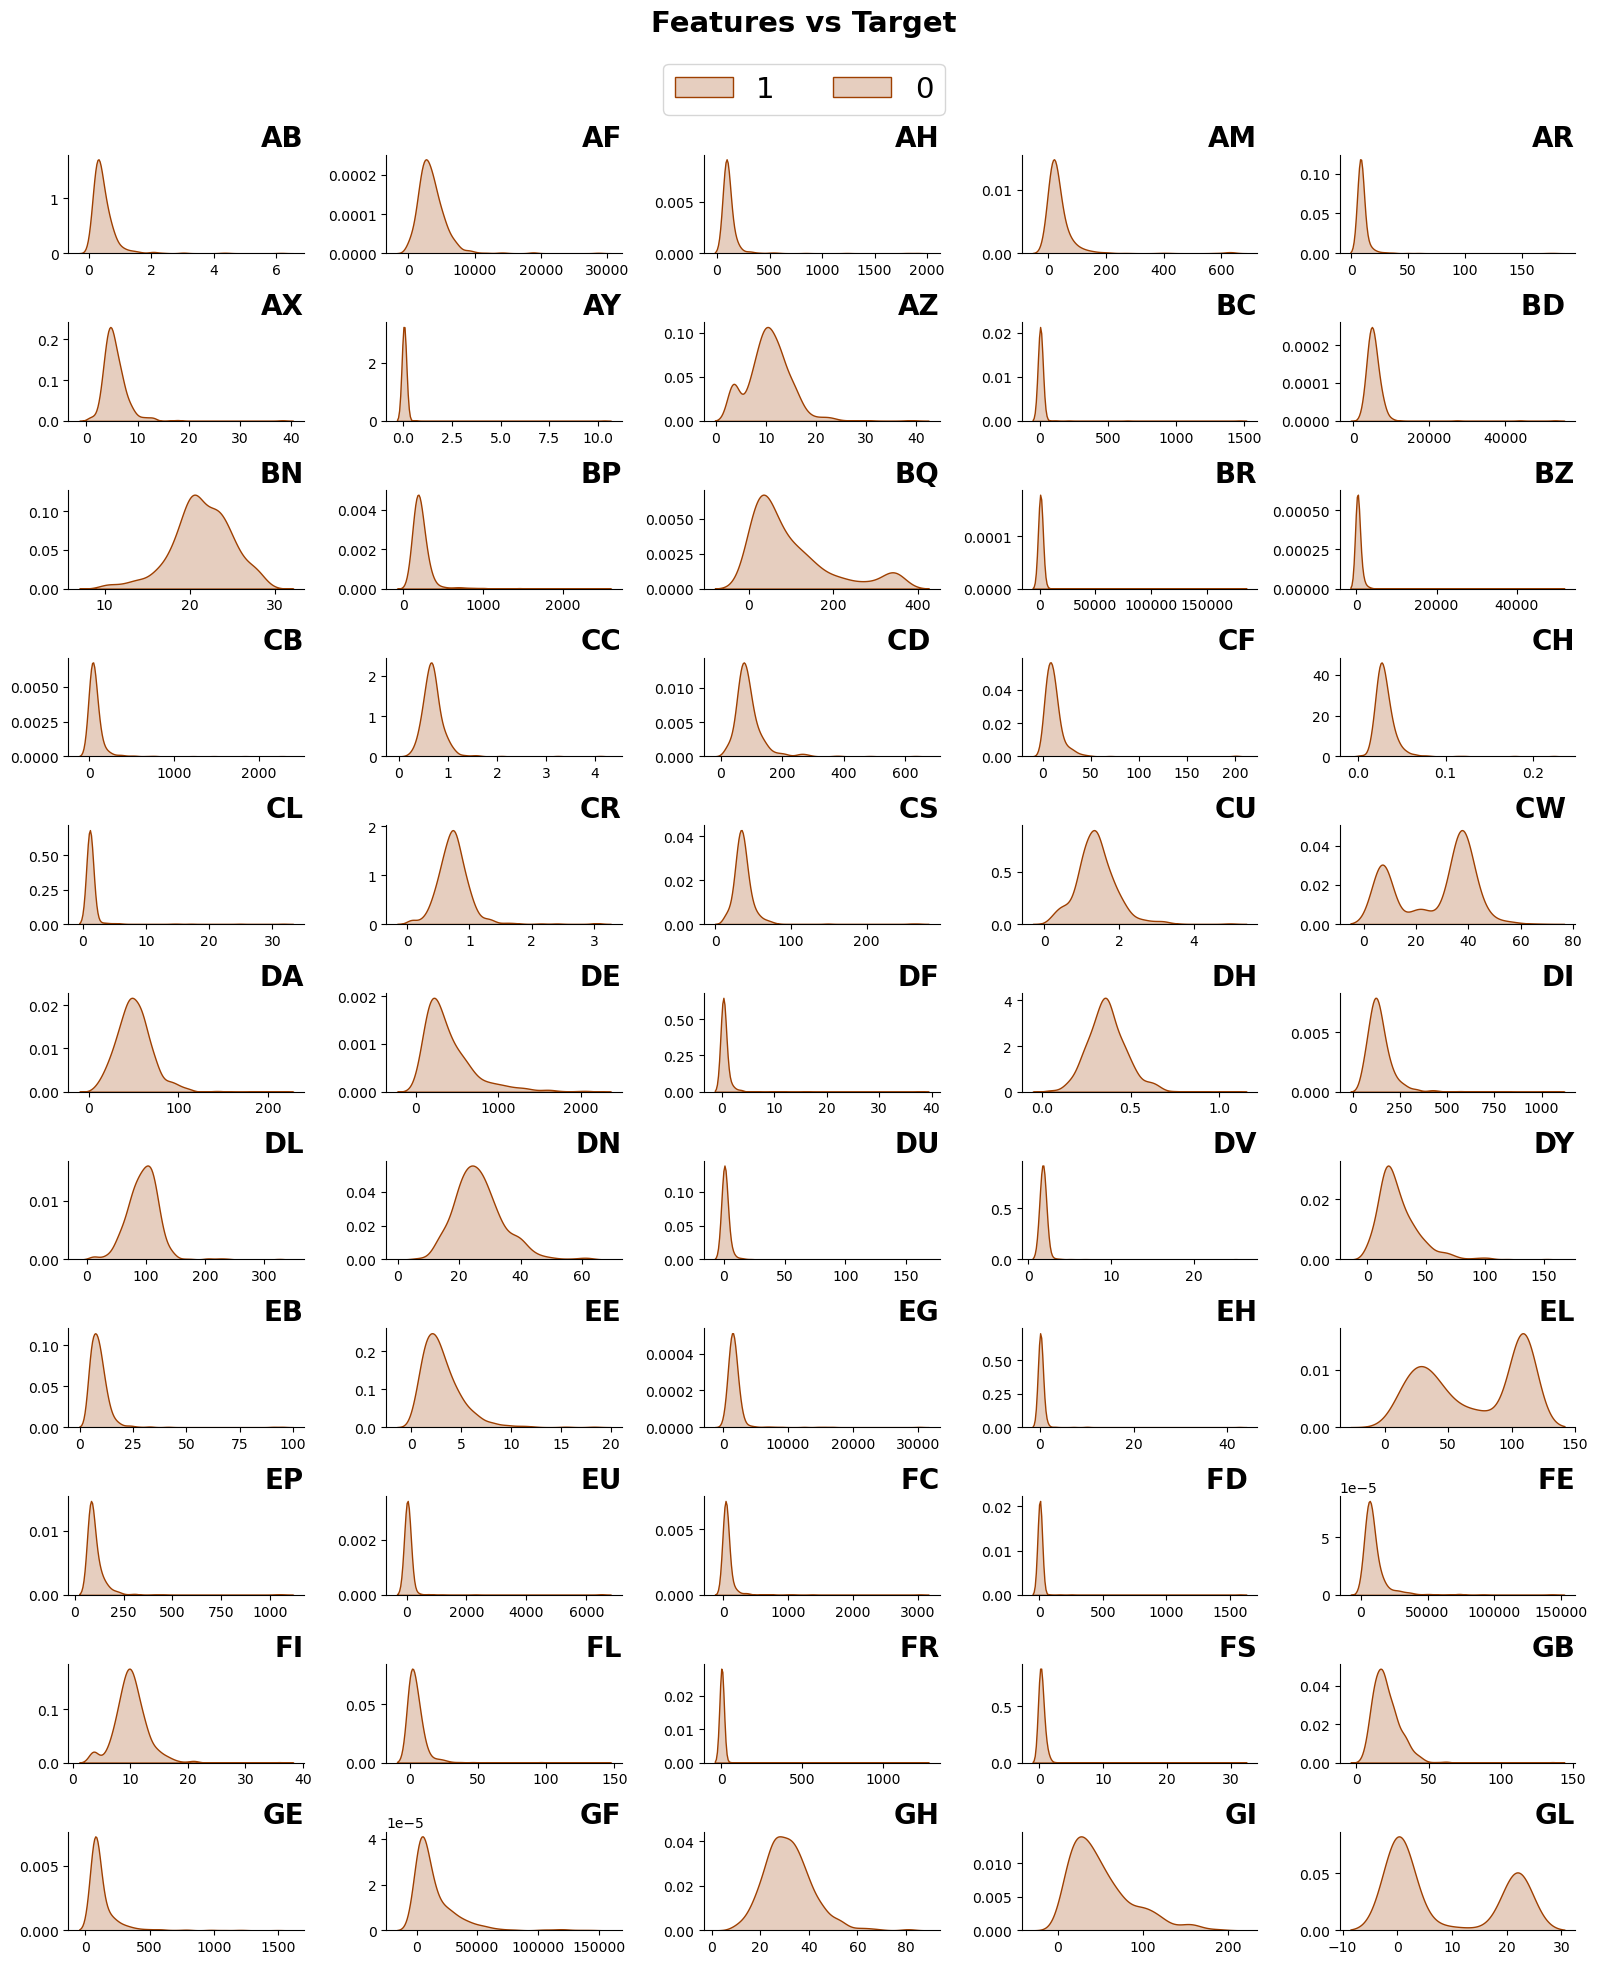

In [11]:
figsize = (4*4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(numericalFeatures):
    ax = plt.subplot(11,5, idx + 1)
    sns.kdeplot(
        data=dfTr, fill=True,
        x=col, color='#9E3F00', legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

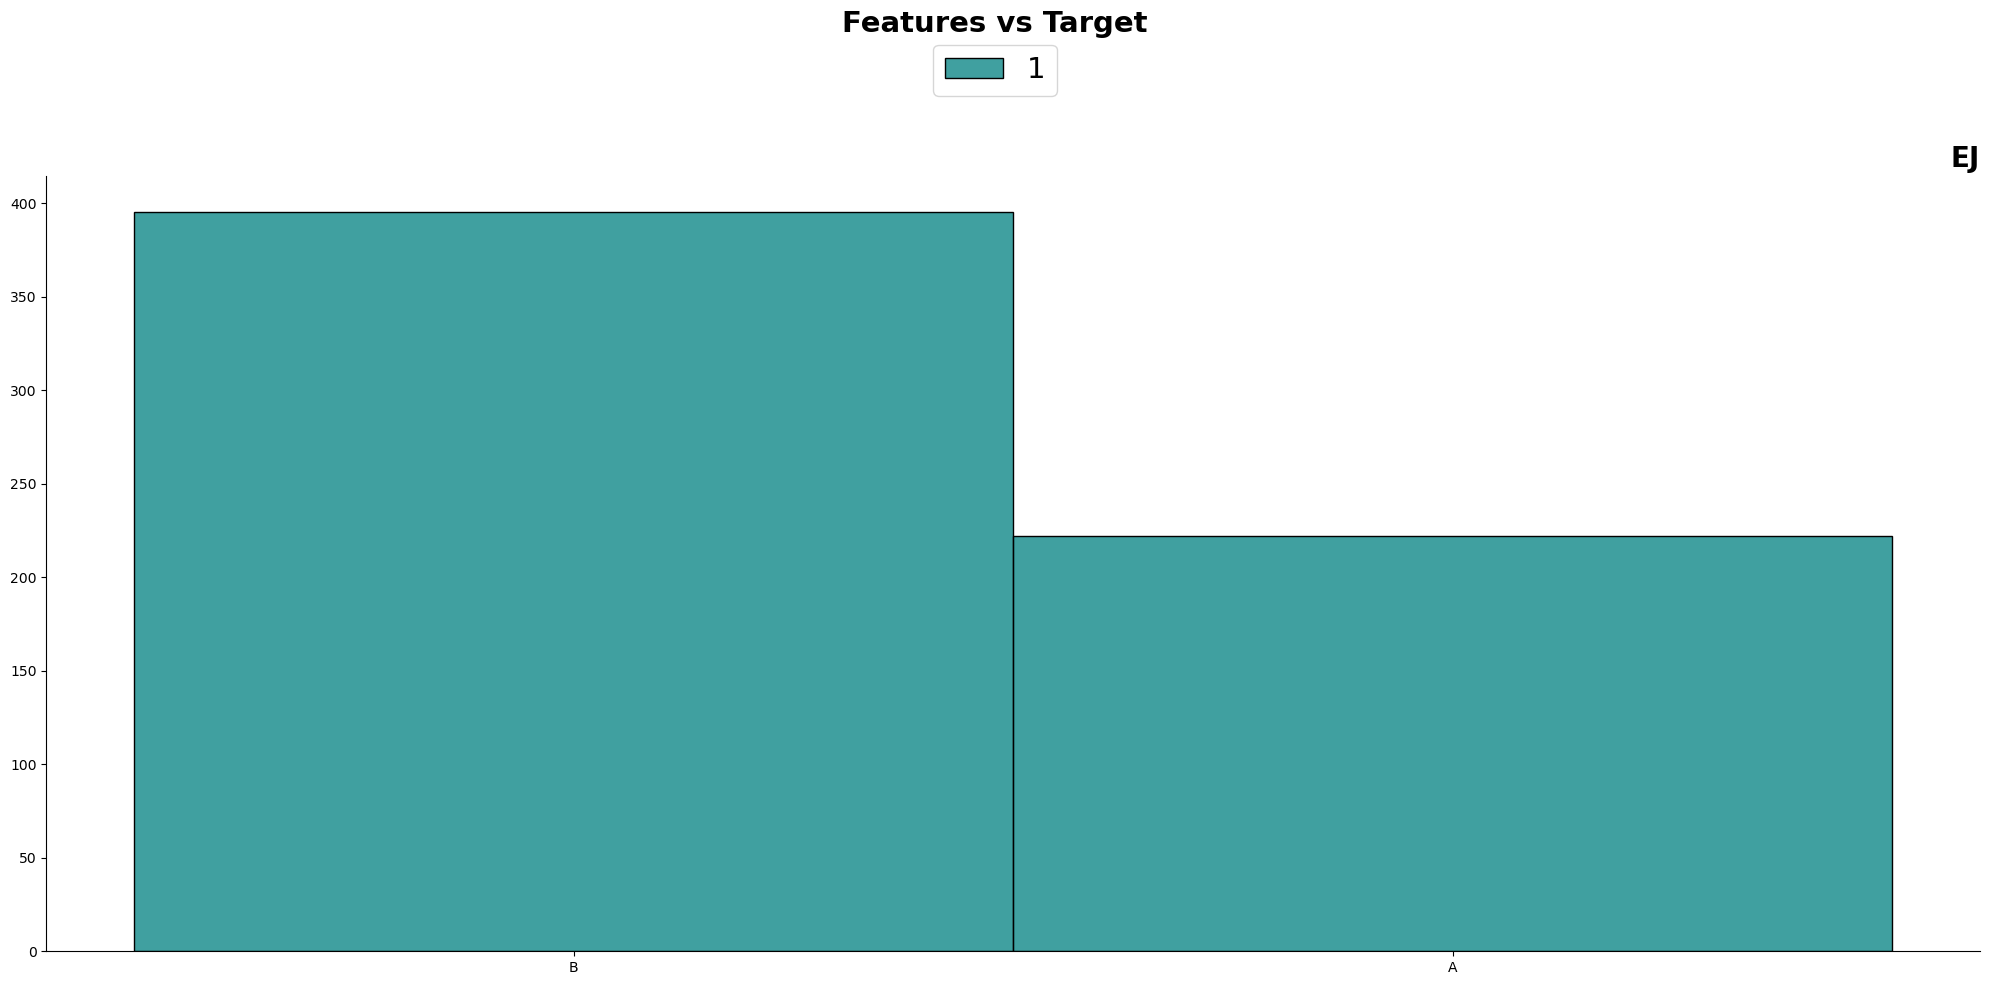

In [12]:
categoryFeatures=['EJ']
figsize = (4*5, 10)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(categoryFeatures):
    ax = plt.subplot(1,1, idx + 1)
    sns.histplot(
        data=dfTr, fill=True,
        x=col, color= 'Teal', legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

### <b> Distrbution with respect to the target

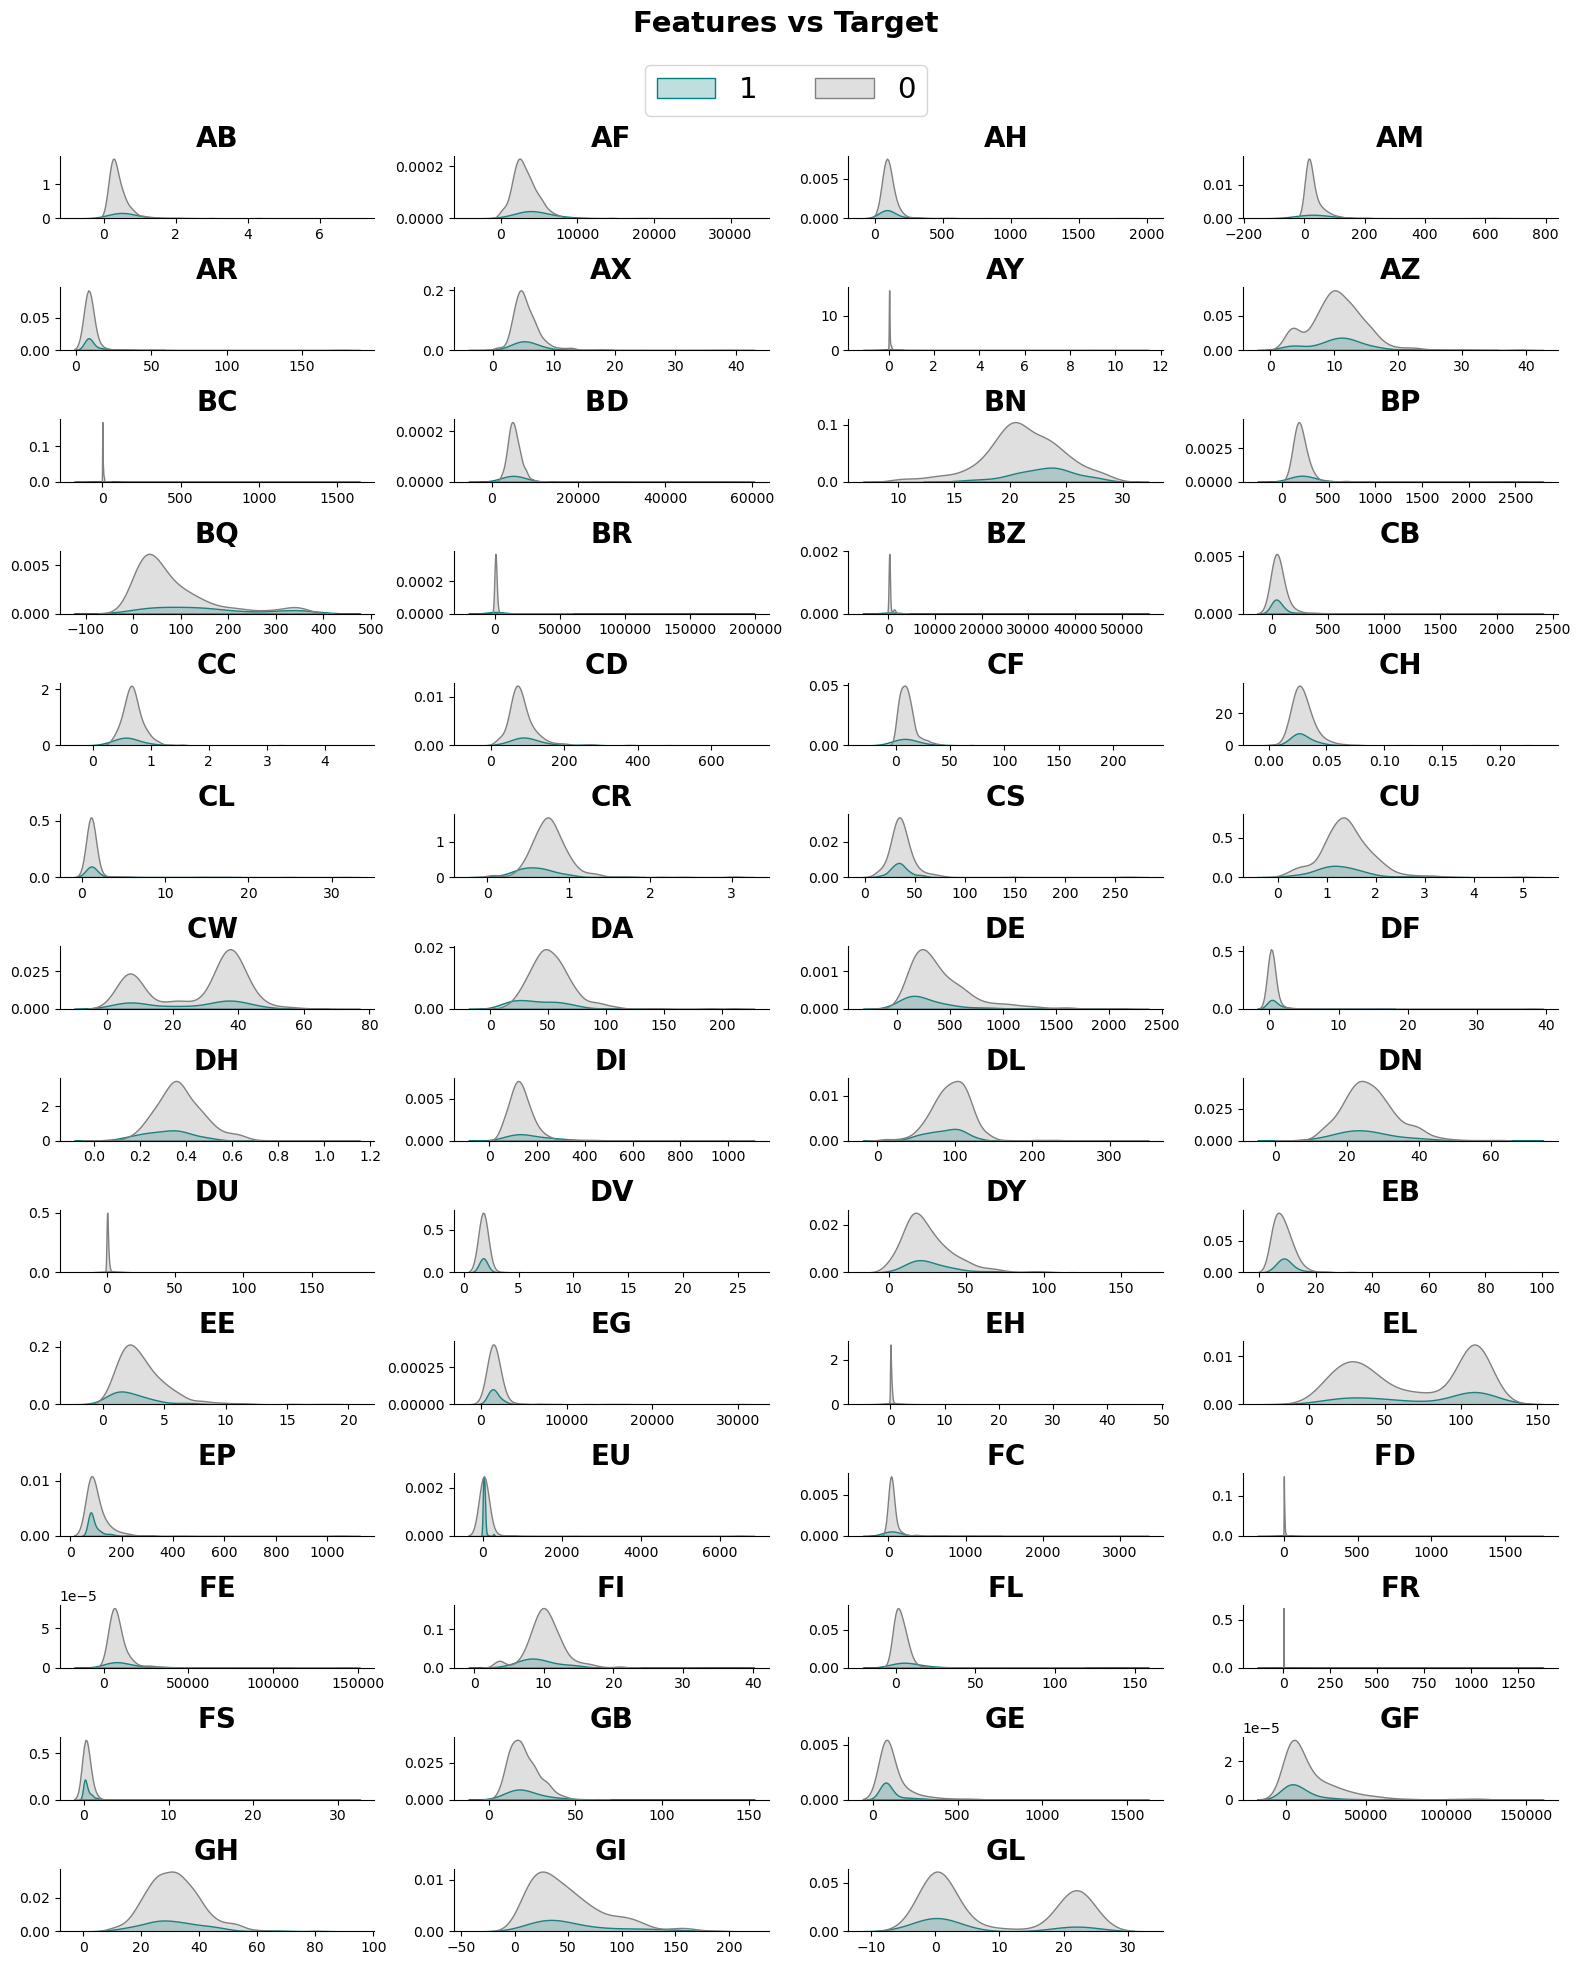

In [13]:
figsize = (4*4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(numericalFeatures):
    ax = plt.subplot(14,4, idx + 1)
    sns.kdeplot(
        hue='Class',
        data=dfTr, fill=True,
        x=col, palette=["Gray", "Teal"], legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='center', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

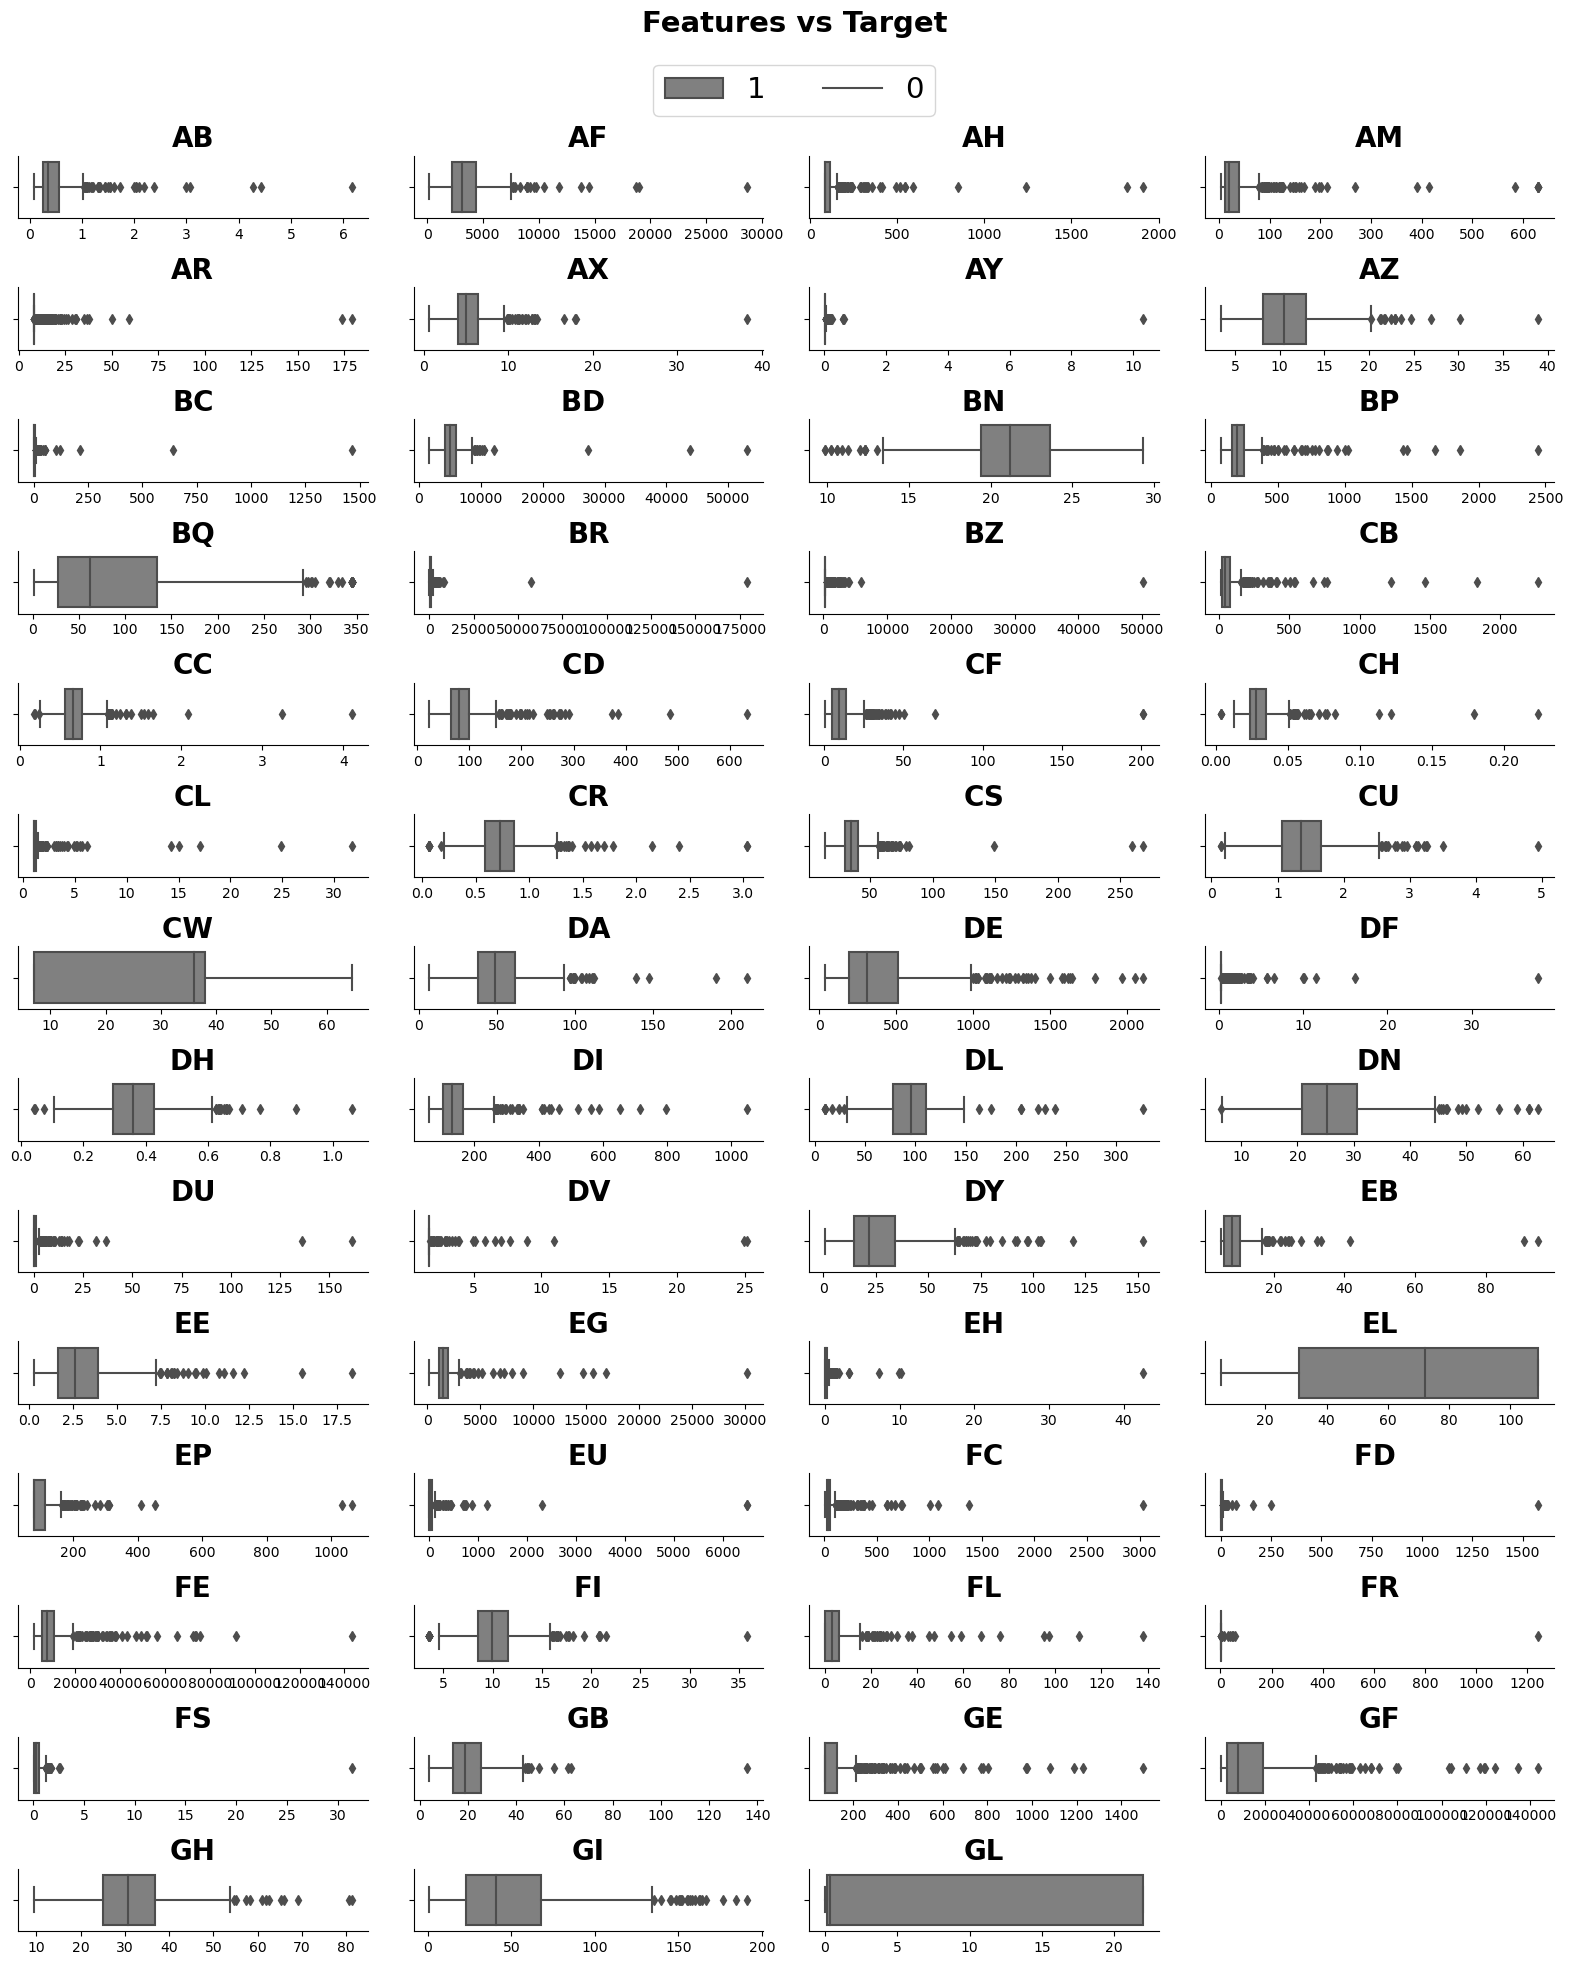

In [14]:
figsize = (4*4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(numericalFeatures):
    ax = plt.subplot(14,4, idx + 1)
    sns.boxplot(
        data=dfTr, 
        x=col,
        palette=["Gray", "Teal"]
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='center', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

<b> There are alot of outliers and null values all over the feature so let's Fill the nulls first

### <b> Fill The Nulls Using KNN Imputer

In [15]:
from datetime import date, datetime
times = dfGr.Epsilon.copy()
times[dfGr.Epsilon != 'Unknown'] = dfGr.Epsilon[dfGr.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
times[dfGr.Epsilon == 'Unknown'] = np.nan
times

0      737137.0
1           NaN
2           NaN
3           NaN
4      737509.0
         ...   
612    737681.0
613    737676.0
614    737264.0
615    737090.0
616         NaN
Name: Epsilon, Length: 617, dtype: object

In [16]:
from sklearn.impute import KNNImputer


In [17]:
featuresWithNulls = dfTr.columns[dfTr.isnull().any()]
imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed

# Fill null values with imputed values
dfTr[featuresWithNulls] = imputer.fit_transform(dfTr[featuresWithNulls])
dfTr.isnull().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

### After Felling the nulls let's Try to Do some Work with the out liers

## OutLiers

In [18]:
from sklearn.impute import KNNImputer
from scipy import stats


In [19]:
index=[]

# loop on numerical Features
for col in numericalFeatures:
    firstQuanitle,secondQuantile=dfTr[col].quantile([0.25,0.75])
    index.extend(dfTr.loc[(dfTr[col]>=2.5*secondQuantile) | (dfTr[col]<=0.5*firstQuanitle),col].index)

In [20]:
len(set(index))


552

### The Outliers is spread over all the data So kind of transformation

In [21]:
dfTr['EJ'] = dfTr['EJ'].replace({'A': 0, 'B': 1})
dfTs['EJ'] = dfTr['EJ'].replace({'A': 0, 'B': 1})


## Modeling

In [22]:
X=dfTr.drop("Class",axis=1)
y=dfTr["Class"]
X=pd.concat((X, times), 1)
X_test=dfTs.copy()
X['Epsilon']=X['Epsilon'].astype(float)
X

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0


In [23]:
X_test['Epsilon']=X.Epsilon.max()+1

In [24]:
X_test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0


In [25]:
params = {
    'boosting_type': 'GBDT',
    'objective':"binary",
    'metric':'binary_logloss',
    'random_state': 42,
}


In [26]:
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [27]:
for i in range(20):
    
    positive_count_train = y.value_counts()[1]
    sampler = RandomUnderSampler(sampling_strategy={0: positive_count_train, 1: positive_count_train},random_state=i, replacement=True)
    X_re, y_re = sampler.fit_resample(X, y)

    lgb_train = lgb.Dataset(X_re.drop("Id",axis=1), y_re,free_raw_data=False)
    
    
    model = lgb.train(params, lgb_train, 
                      categorical_feature = categoryFeatures,
                      num_boost_round=500,
                      verbose_eval=200)
    
    pred = model.predict(X_test.drop("Id",axis=1),num_iteration=model.best_iteration)

    if i == 0:
        output2 = pd.DataFrame(pred, columns=['pred' + str(i + 1)])
    else:
        output = pd.DataFrame(pred, columns=['pred' + str(i + 1)])
        output2 = pd.concat([output2, output], axis=1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 108, number of negative: 108
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2919
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [28]:
 pred = output2.mean(axis='columns')
submit=pd.DataFrame(dfTs["Id"], columns=["Id"])


In [29]:
submit["class_0"]=1-pred
submit["class_1"]=pred

In [30]:
submit.to_csv('submission.csv',index=False)
submit

,Id,class_0,class_1
0,00eed32682bb,0.670727,0.329273
1,010ebe33f668,0.669156,0.330844
2,02fa521e1838,0.670727,0.329273
3,040e15f562a2,0.670727,0.329273
4,046e85c7cc7f,0.670727,0.329273
